In [73]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns



In [74]:
df = pd.read_csv("imdb_labelled.csv", header=None)
df.columns = ['message', 'sentiment']
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index()

print(df.head())

   index                                            message  sentiment
0      0  A very, very, very slow-moving, aimless movie ...        0.0
1      1  Not sure who was more lost - the flat characte...        0.0
2      2  Attempting artiness with black & white and cle...        0.0
3      3       Very little music or anything to speak of.          0.0
4      4  The best scene in the movie was when Gerardo i...        1.0


In [75]:
#print(df.loc[300:400, ["message", "sentiment"]])

In [76]:
keywords = ['bad', 'boring','worst', 'wasted', 'insult', 'horrible', 'embarrassing', 'predictable',
            'hated', 'very', 'not', 'lost', 'average', 'problem', 'nothing', 'ridiculous', 'pretentious', 
            'long', 'suffered', 'weak', 'vomit', 'tolerate']
            
            
for key in keywords:

    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )


## The heat map below shows that our features are independent from each other.  Some variables, such as the words 'frustrated' and 'sabotage',were initially put into our keywords, but it had alot of correlation with the other variables, so I took them out of the model.

AxesSubplot(0.125,0.125;0.62x0.755)


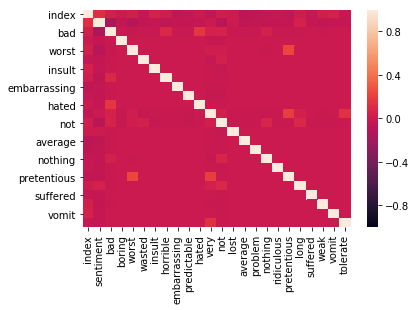

In [77]:
df_heat = sns.heatmap(df.corr(), vmin= -1)

print(df_heat)

## Using the feature variables, the Bernoulli classifer I setup below using sklearn will test how good our model is at labeling the correct sentiment with each message in our dataset.

In [78]:
data = df[keywords]
target = df['sentiment']

In [79]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

#print(y_pred)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 992 points : 411
